In [5]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt


In [14]:
df =pd.read_csv('ML-13.airline_passengers.csv')

In [15]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [16]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [17]:
df.dropna(axis=0,inplace=True)

In [19]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [21]:
df.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [23]:
df['Month']=pd.to_datetime(df['Month'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [26]:
df.set_index('Month',inplace=True)

In [27]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

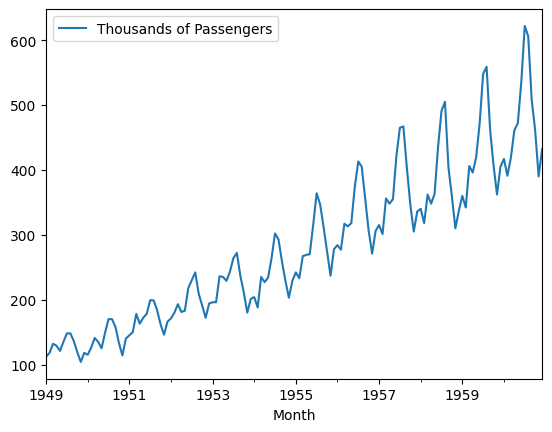

In [28]:
df.plot()

In [30]:
pip install statsmodels


                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB 1.4 MB/s eta 0:00:07
                                              0.0/9.2 MB 495.5 kB/s eta 0:00:19
                                              0.1/9.2 MB 563.7 kB/s eta 0:00:17
                                              0.1/9.2 MB 585.1 kB/s eta 0:00:16
                                              0.1/9.2 MB 602.4 kB/s eta 0:00:16
                                              0.1/9.2 MB 607.9 kB/s eta 0:00:15
                                              0.2/9.2 MB 583.1 kB/s eta 0:00:16
                                              0.2/9.2 MB 620.6 kB/s eta 0:00:15
                                              0.2/9.2 MB 599.0 kB/s eta 0:00:15
     -                                        0.2/9.2 MB 577.6 kB/s eta 0:00:16
     -                                        0.3/9.2 MB 630.9 kB/s eta 0:00:15
     -                                        0.3/

In [31]:
from statsmodels.tsa.stattools import adfuller

In [38]:
def adi(series):
    result=adfuller(series)
    print('p.values:{}'.format(result[1]))
    if result[1]<0.05:
        print ('stationary')
    else:
        print( "nom-stationary")

In [39]:
adi(df)

p.values:0.9918802434376409
nom-stationary


In [44]:
df['diff']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(2)

In [45]:
df

,Thousands of Passengers,diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1960-08-01,606.0,71.0
1960-09-01,508.0,-114.0
1960-10-01,461.0,-145.0


In [46]:
adi(df['diff'].dropna())

p.values:0.03862975767698849
stationary


In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

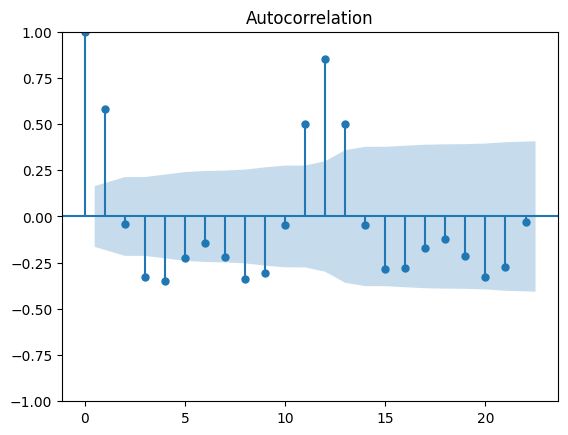

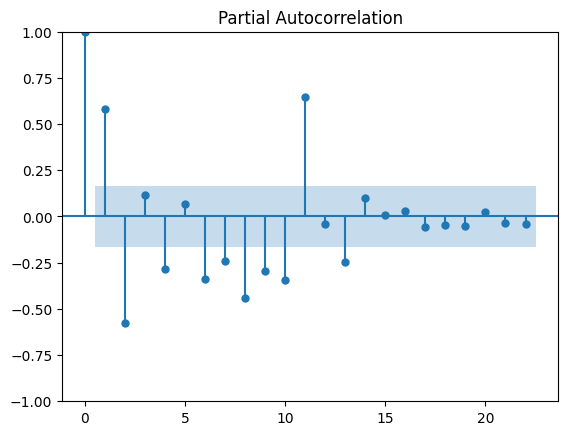

In [48]:
acf=plot_acf(df['diff'].dropna())
pacf=plot_pacf(df['diff'].dropna())

In [49]:
from datetime import datetime,timedelta


In [52]:
df

,Thousands of Passengers,diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1960-08-01,606.0,71.0
1960-09-01,508.0,-114.0
1960-10-01,461.0,-145.0


In [55]:
train_end=datetime(1955,12,1)
test_end=datetime(1960,12,1)

In [56]:
train_data=df[:train_end]
test_data=df[train_end+timedelta(days=1):test_end]

In [57]:
pred_start_data=test_data.index[0]
pred_end_data=test_data.index[-1]

In [58]:
pred_start_data

Timestamp('1956-01-01 00:00:00')

In [59]:
pred_end_data

Timestamp('1960-12-01 00:00:00')

In [60]:
test_data

,Thousands of Passengers,diff
Month,,
1956-01-01,284.0,47.0
1956-02-01,277.0,-1.0
1956-03-01,317.0,33.0
1956-04-01,313.0,36.0
1956-05-01,318.0,1.0
1956-06-01,374.0,61.0
1956-07-01,413.0,95.0
1956-08-01,405.0,31.0
1956-09-01,355.0,-58.0


In [61]:
from statsmodels.tsa.arima.model import ARIMA

In [64]:
model=ARIMA(train_data['Thousands of Passengers'],order=[14,1,12])

C:\Users\AK\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\AK\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\AK\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
 model=model.fit()

C:\Users\AK\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\AK\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\AK\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
pred=model.predict(start=pred_start_data,end=pred_end_data)
residual=test_data['Thousands of Passengers']-pred

In [68]:
residual

Month
1956-01-01     -0.636266
1956-02-01     -1.048547
1956-03-01     15.781034
1956-04-01      6.172629
1956-05-01      9.561722
1956-06-01     22.196285
1956-07-01     16.350971
1956-08-01     28.701450
1956-09-01     12.030390
1956-10-01     -2.372073
1956-11-01     -5.845207
1956-12-01     -4.552917
1957-01-01     -5.211373
1957-02-01     -7.209845
1957-03-01     27.991693
1957-04-01     12.602388
1957-05-01     14.619075
1957-06-01     39.438785
1957-07-01     37.678617
1957-08-01     63.478542
1957-09-01     31.907597
1957-10-01      7.341666
1957-11-01     -7.371304
1957-12-01     -5.676781
1958-01-01    -11.625993
1958-02-01    -19.115802
1958-03-01     10.343094
1958-04-01    -15.071520
1958-05-01     -6.041721
1958-06-01     23.020882
1958-07-01     36.901606
1958-08-01     75.364757
1958-09-01      5.994519
1958-10-01    -10.624529
1958-11-01    -35.006916
1958-12-01    -34.004323
1959-01-01    -20.289405
1959-02-01    -21.771457
1959-03-01     32.236071
1959-04-01      7.4

<Axes: xlabel='Month'>

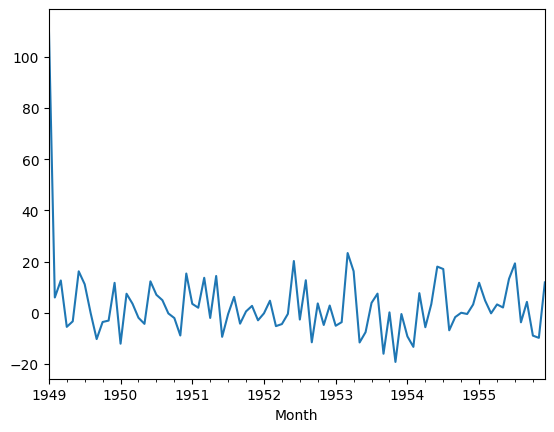

In [71]:
model.resid.plot()

In [72]:
test_data['pred.arima']=pred

C:\Users\AK\AppData\Local\Temp\ipykernel_11060\1195086428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred.arima']=pred


In [73]:
test_data

,Thousands of Passengers,diff,pred.arima
Month,,,
1956-01-01,284.0,47.0,284.636266
1956-02-01,277.0,-1.0,278.048547
1956-03-01,317.0,33.0,301.218966
1956-04-01,313.0,36.0,306.827371
1956-05-01,318.0,1.0,308.438278
1956-06-01,374.0,61.0,351.803715
1956-07-01,413.0,95.0,396.649029
1956-08-01,405.0,31.0,376.298550
1956-09-01,355.0,-58.0,342.969610


In [74]:
train_data

,Thousands of Passengers,diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1955-08-01,347.0,32.0
1955-09-01,312.0,-52.0
1955-10-01,274.0,-73.0


<Axes: xlabel='Month'>

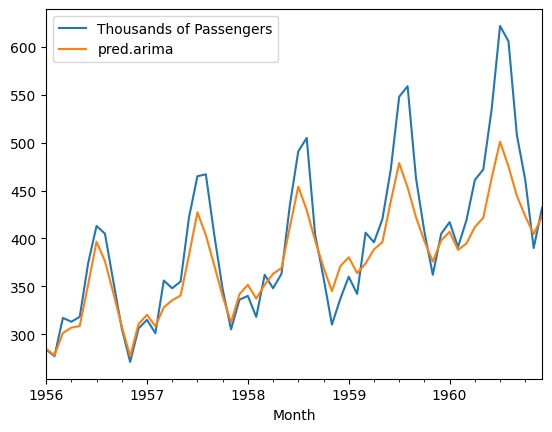

In [77]:
test_data[['Thousands of Passengers','pred.arima']].plot()

In [79]:
from pandas.tseries.offsets import DateOffset
future_date=[df.index[-1]+DateOffset(months=x)for x in range(1,25)]

In [82]:
future_data=pd.DataFrame(index=future_date[1:],columns=df.columns)

In [92]:
future_data.tail()

,Thousands of Passengers,diff
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN
1962-12-01,NaN,NaN


In [84]:
fd=pd.concat([df,future_data])

In [85]:
fd.head()

,Thousands of Passengers,diff
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0


In [86]:
fd.tail()

,Thousands of Passengers,diff
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN
1962-12-01,NaN,NaN


In [93]:
fd['forecast']=model.predict(start='1961-02-01',end='1962-12-01')

<Axes: >

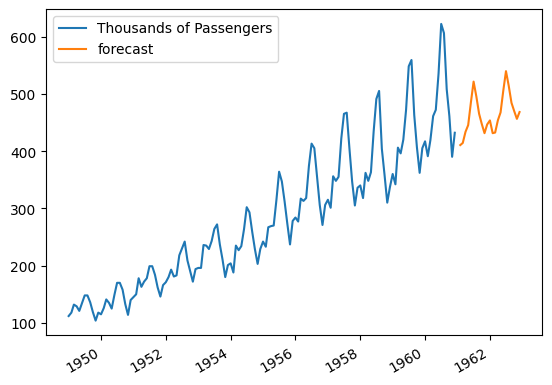

In [94]:
fd[["Thousands of Passengers",'forecast']].plot()